In [ ]:
## Dataset can be downloaded from the below kaggle link
# https://www.kaggle.com/datasets/rmisra/news-category-dataset

# or using this command if the kaggle configuration is setup
# !kaggle datasets download -d rmisra/news-category-dataset

In [1]:
## GPU Check
import torch

is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [1]:
# Unzipping the data
!unzip /users/PGS0310/sdasari6/ondemand/Practicum/dataset/News_data.zip

Archive:  /users/PGS0310/sdasari6/ondemand/Practicum/dataset/News_data.zip
  inflating: News_Category_Dataset_v3.json  


In [2]:
import json

# Reading only one record to get the columns list for dataframe
with open('./News_Category_Dataset_v3.json', 'r') as f:
  line = f.readline()
  json_line = json.loads(line)
  print(json_line)
columns = list(json_line.keys())
columns

{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9', 'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters', 'category': 'U.S. NEWS', 'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.', 'authors': 'Carla K. Johnson, AP', 'date': '2022-09-23'}


['link', 'headline', 'category', 'short_description', 'authors', 'date']

In [3]:
# Reading the entire data and adding to a list

f = open('./News_Category_Dataset_v3.json', 'r')

news_list = []

count = 0
while True:
  count += 1
  line = f.readline()
  if not line:
    print("total lines", count)
    break
  json_line = json.loads(line)
  news_list.append(json_line)
  # print(json_line)

f.close()


total lines 209528


In [4]:
len(news_list)

209527

In [5]:
import numpy as np
import pandas as pd

# Converting the news data to pandas dataframe
df = pd.DataFrame.from_dict(news_list)
df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [6]:
# dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209527 non-null  object
 2   category           209527 non-null  object
 3   short_description  209527 non-null  object
 4   authors            209527 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


In [7]:
# Getting the top 15 categories for prediction
value_counts = df.category.value_counts()
top_15_categories = value_counts.index.array[:15]
top_15_categories

<PandasArray>
[      'POLITICS',       'WELLNESS',  'ENTERTAINMENT',         'TRAVEL',
 'STYLE & BEAUTY',      'PARENTING', 'HEALTHY LIVING',   'QUEER VOICES',
   'FOOD & DRINK',       'BUSINESS',         'COMEDY',         'SPORTS',
   'BLACK VOICES',  'HOME & LIVING',        'PARENTS']
Length: 15, dtype: object

In [8]:
# Checking the value counts for each category
df_new = df[df.category.isin(top_15_categories)][['headline', 'short_description', 'category']]
df_new.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
Name: category, dtype: int64

In [9]:
# data sample
df_new.head()

,headline,short_description,category
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
17,"Maury Wills, Base-Stealing Shortstop For Dodge...","Maury Wills, who helped the Los Angeles Dodger...",SPORTS
20,Golden Globes Returning To NBC In January Afte...,"For the past 18 months, Hollywood has effectiv...",ENTERTAINMENT
21,Biden Says U.S. Forces Would Defend Taiwan If ...,President issues vow as tensions with China rise.,POLITICS


In [10]:
# Converting the label to encoded format
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_new['categoryEncoded'] = encoder.fit_transform(df_new['category'])
df_new.head()

,headline,short_description,category,categoryEncoded
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY,2
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING,7
17,"Maury Wills, Base-Stealing Shortstop For Dodge...","Maury Wills, who helped the Los Angeles Dodger...",SPORTS,11
20,Golden Globes Returning To NBC In January Afte...,"For the past 18 months, Hollywood has effectiv...",ENTERTAINMENT,3
21,Biden Says U.S. Forces Would Defend Taiwan If ...,President issues vow as tensions with China rise.,POLITICS,9


In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data to train and test splits with 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(df_new[['headline', 'short_description']], df_new['categoryEncoded'], random_state = 42, test_size = 0.3)

### Simple LSTM

In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


[nltk_data] Downloading package stopwords to
[nltk_data]     /users/PGS0310/sdasari6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
# Preprocessing string
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

def tokenize(x_train, y_train, x_val, y_val):
    word_list = []

    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    # Creating a corpus
    corpus = Counter(word_list)
    print("length of corpus", len(corpus))
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:50000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tokenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])


    encoded_train = to_categorical(y_train, num_classes=15)
    encoded_test = to_categorical(y_test, num_classes=15)
    return np.array(final_list_train), np.array(encoded_train), np.array(final_list_test), np.array(encoded_test), onehot_dict


In [65]:
ndf = df_new.copy()
# combining the headline and short description data and dropping the actual columns from the dataframe
ndf['news'] = ndf['headline'] + ndf['short_description']
ndf.drop(['headline','short_description'], inplace=True, axis=1)

In [66]:
# Taking the X and encoding the labels(y)
X = ndf['news']
encoder = LabelEncoder()
y = encoder.fit_transform(ndf['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [67]:
x_train, y_train, x_test, y_test, vocab =  tokenize(X_train, y_train, X_test, y_test)

length of corpus 157229


/tmp/slurmtmp.23237426/ipykernel_219285/1967545172.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(encoded_train), np.array(final_list_test), np.array(encoded_test), onehot_dict


In [68]:
# corpus.most_common(50000)[-10:]

In [69]:
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 50000


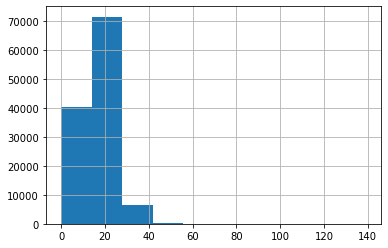

count    118497.000000
mean         16.324945
std           6.932273
min           0.000000
25%          12.000000
50%          16.000000
75%          20.000000
max         139.000000
dtype: float64

In [70]:
# Plotting a histogram for the length of each sentence
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [71]:
# Padding the input sentence
def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review) != 0:
            features[ii, -len(review):] = np.array(review)[:seq_len]
    return features

In [72]:
# We can see from the above histogram that the highest length of a sentence is 50
x_train_pad = padding_(x_train, 50)
x_test_pad = padding_(x_test, 50)

In [73]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_test_pad), torch.from_numpy(y_test))

# batch size
batch_size = 50

# Shuffle the data and drop last batch
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size, drop_last=True)

In [74]:
# Sample input and output
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample output size: ', sample_y.size()) # batch_size, seq_length
print('Sample output: \n', sample_y)

Sample input size:  torch.Size([50, 50])
Sample input: 
 tensor([[    0,     0,     0,  ..., 12989,   134,  1650],
        [    0,     0,     0,  ...,  1019,  3428,  7142],
        [    0,     0,     0,  ...,   193,   232,  3249],
        ...,
        [    0,     0,     0,  ...,  5026,   193,   153],
        [    0,     0,     0,  ...,     3,  6907,   340],
        [    0,     0,     0,  ...,     3,    11,   731]])
Sample output size:  torch.Size([50, 15])
Sample output: 
 tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.,

In [75]:
class SentimentRNN(nn.Module):
    def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5):
        super(SentimentRNN,self).__init__()

        self.output_dim = output_dim
        self.hidden_dim = hidden_dim

        self.no_layers = no_layers
        self.vocab_size = vocab_size

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layer
        self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                           num_layers=no_layers,  batch_first=True)

        # dropout layer
        self.dropout1 = nn.Dropout(0.3)
        # linear 1
        self.fc1 = nn.Linear(self.hidden_dim, self.hidden_dim)
        # # dropout layer 2
        self.dropout2 = nn.Dropout(0.3)
        # # linear 2
        self.fc2 = nn.Linear(self.hidden_dim, output_dim)
        # sigmoid
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, hidden):
        batch_size = x.size(0)
        # embeddings and lstm_out
        embeds = self.embedding(x)  
        
        lstm_out, hidden = self.lstm(embeds, hidden)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully connected layer
        out = self.dropout1(lstm_out)
        
        out = self.fc1(out)
        # dropout 2
        out = self.dropout2(out)
        # fully connected layer 2
        out = self.fc2(out)
        # sigmoid function
        sig_out = self.softmax(out)

        # print("1", sig_out.shape)
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1, sig_out.shape[1])
        # print("2", sig_out.shape)
        sig_out = sig_out[:, -1, :] # get last batch of labels
        # print("3", sig_out.shape)
        return sig_out, hidden



    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        h0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        c0 = torch.zeros((self.no_layers,batch_size,self.hidden_dim)).to(device)
        hidden = (h0,c0)
        return hidden



In [76]:
no_layers = 4 # no. of LSTM layers
vocab_size = len(vocab) + 1 #extra 1 for padding
embedding_dim = 64 # embedding dimensions
output_dim = 15
hidden_dim = 256


model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, drop_prob=0.5)

#moving to gpu
model.to(device)

print(model)


SentimentRNN(
  (embedding): Embedding(50001, 64)
  (lstm): LSTM(64, 256, num_layers=4, batch_first=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=256, out_features=256, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=256, out_features=15, bias=True)
  (softmax): Softmax(dim=-1)
)


In [77]:
# loss and optimization functions
lr=0.001

# Cross entropy loss
criterion = nn.CrossEntropyLoss()

# Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to calculate accuracy
def acc(pred, label):
    pred = torch.round(pred.squeeze())
    # print("pred", pred[0])
    # print("labels", label.squeeze()[0])
    # print(torch.argmax(pred) == torch.argmax(label.squeeze()))
    return torch.sum(torch.argmax(pred) == torch.argmax(label.squeeze())).item()

In [30]:
# creating a directory called working
!mkdir working

In [78]:
clip = 3
epochs = 10
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss,epoch_vl_loss = [],[]

epoch_tr_acc,epoch_vl_acc = [],[]

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0
    model.train()
    # initialize hidden state
    h = model.init_hidden(batch_size)
    for inputs, labels in train_loader:

        inputs, labels = inputs.to(device), labels.to(device)
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        model.zero_grad()
        output,h = model(inputs, h)

        # calculate the loss and perform backprop
        # print(output.shape, output.squeeze().shape, labels.shape)
        loss = criterion(output.squeeze(), labels.float())
        # back propagation
        loss.backward()
        train_losses.append(loss.item())
        # calculating accuracy
        accuracy = acc(output,labels)
        train_acc += accuracy
        #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()


    val_h = model.init_hidden(batch_size)
    val_losses = []
    val_acc = 0.0
    model.eval()
    for inputs, labels in valid_loader:
            val_h = tuple([each.data for each in val_h])

            inputs, labels = inputs.to(device), labels.to(device)

            output, val_h = model(inputs, val_h)
            val_loss = criterion(output.squeeze(), labels.float())

            val_losses.append(val_loss.item())

            accuracy = acc(output,labels)
            val_acc += accuracy

    epoch_train_loss = np.mean(train_losses)
    epoch_val_loss = np.mean(val_losses)
    epoch_train_acc = train_acc/len(train_loader.dataset)
    epoch_val_acc = val_acc/len(valid_loader.dataset)
    epoch_tr_loss.append(epoch_train_loss)
    epoch_vl_loss.append(epoch_val_loss)
    epoch_tr_acc.append(epoch_train_acc)
    epoch_vl_acc.append(epoch_val_acc)
    print(f'Epoch {epoch+1}')
    print(f'train_loss : {epoch_train_loss} val_loss : {epoch_val_loss}')
    print(f'train_accuracy : {epoch_train_acc*100} val_accuracy : {epoch_val_acc*100}')
    if epoch_val_loss <= valid_loss_min:
        torch.save(model.state_dict(), './working/state_dict.pt')
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,epoch_val_loss))
        valid_loss_min = epoch_val_loss
    print(25*'==')


Epoch 1
train_loss : 2.5769037709250235 val_loss : 2.5744421409594045
train_accuracy : 0.5004346101589069 val_accuracy : 0.4962025316455696
Validation loss decreased (inf --> 2.574442).  Saving model ...
Epoch 2
train_loss : 2.5765873739718383 val_loss : 2.5744759327656515
train_accuracy : 0.4894638682835853 val_accuracy : 0.5535864978902953
Epoch 3
train_loss : 2.5765789373356767 val_loss : 2.574374572248072
train_accuracy : 0.5164687713613003 val_accuracy : 0.4928270042194093
Validation loss decreased (2.574442 --> 2.574375).  Saving model ...
Epoch 4
train_loss : 2.5765789361279845 val_loss : 2.574442146597682
train_accuracy : 0.4624589652058702 val_accuracy : 0.5029535864978902
Epoch 5
train_loss : 2.5765536127336017 val_loss : 2.5745772944914327
train_accuracy : 0.4886199650624067 val_accuracy : 0.5063291139240507
Epoch 6
train_loss : 2.57654516724103 val_loss : 2.574475921086363
train_accuracy : 0.46583457809058454 val_accuracy : 0.5029535864978902
Epoch 7
train_loss : 2.57657893

In [79]:
print("Min validation loss:", valid_loss_min)
min_loss_index = epoch_vl_loss.index(valid_loss_min)

Min validation loss: 2.574374572248072


In [80]:
final_acc = epoch_tr_acc[min_loss_index]*100
print("Final model accuracy:", final_acc)

Final model accuracy: 0.5164687713613003


In [81]:
final_val_acc = epoch_vl_acc[min_loss_index]*100
print("Final val accuracy:", final_val_acc)

Final val accuracy: 0.4928270042194093


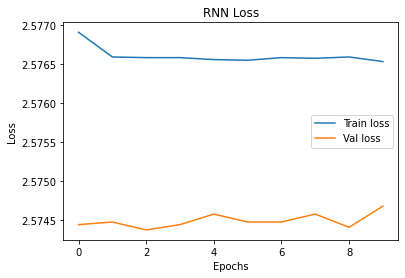

In [83]:
## Plotting

plt.title("RNN Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epoch_tr_loss)
plt.plot(epoch_vl_loss)
plt.legend(labels=["Train loss", "Val loss"])
plt.show()

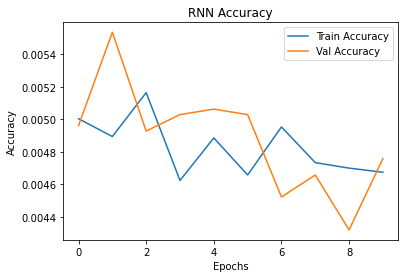

In [84]:
plt.title("RNN Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(epoch_tr_acc)
plt.plot(epoch_vl_acc)
plt.legend(labels=["Train Accuracy", "Val Accuracy"])
plt.show()

### Bidirectional RNN - TF

In [12]:
import os
import re
import nltk
from markupsafe import escape
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# model building imports
from keras.layers import Embedding, Flatten, Dense, Dropout
from keras.layers import Conv1D, SimpleRNN, Bidirectional, MaxPooling1D, GlobalMaxPool1D, LSTM, GRU
from keras.models import Sequential
from keras.regularizers import L1L2

2023-08-01 19:38:38.965014: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 19:38:42.024264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
# Downloading the required data for nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /users/PGS0310/sdasari6/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /users/PGS0310/sdasari6/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /users/PGS0310/sdasari6/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
# clean the text data using regex and data cleaning function
def datacleaning(text):
    whitespace = re.compile(r"\s+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    text = whitespace.sub(' ', text)
    text = user.sub('', text)
    text = re.sub(r"\[[^()]*\]","", text)
    text = re.sub("\d+", "", text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r"(?:@\S*|#\S*|http(?=.*://)\S*)", "", text)
    text = text.lower()

    # removing stop-words
    stop_words = set(stopwords.words('english'))
    text = [word for word in text.split() if word not in list(stop_words)]

    # word lemmatization
    sentence = []
    for word in text:
        lemmatizer = WordNetLemmatizer()
        sentence.append(lemmatizer.lemmatize(word,'v'))

    return ' '.join(sentence)

In [15]:
ndf2 = df_new.copy()
# combining headline and short description
ndf2['news'] = ndf2['headline'] + ndf2['short_description']
ndf2.drop(['headline','short_description'], inplace=True, axis=1)
ndf2['len_news'] = ndf2['news'].map(lambda x: len(x))
ndf2.head()

,category,categoryEncoded,news,len_news
2,COMEDY,2,23 Of The Funniest Tweets About Cats And Dogs ...,133
3,PARENTING,7,The Funniest Tweets From Parents This Week (Se...,215
17,SPORTS,11,"Maury Wills, Base-Stealing Shortstop For Dodge...",179
20,ENTERTAINMENT,3,Golden Globes Returning To NBC In January Afte...,226
21,POLITICS,9,Biden Says U.S. Forces Would Defend Taiwan If ...,108


In [16]:
# index of the data
ndf2.index

Int64Index([     2,      3,     17,     20,     21,     24,     26,     28,
                30,     39,
            ...
            209508, 209509, 209510, 209511, 209512, 209513, 209523, 209524,
            209525, 209526],
           dtype='int64', length=148122)

In [17]:
# Example of pre-processing using above function
print("Text sentence before pre-processing:\n", ndf2['news'][2])
print("---"*35)
print("Text sentence after pre-processing:\n", datacleaning(ndf2['news'][2]))

Text sentence before pre-processing:
 23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)"Until you have a dog you don't understand what could be eaten."
---------------------------------------------------------------------------------------------------------
Text sentence after pre-processing:
 funniest tweet cat dog week sept dog dont understand could eat


In [18]:
# apply datacleaning function to column 'news'
ndf2['news'] = ndf2['news'].apply(datacleaning)

In [19]:
ndf2.head()

,category,categoryEncoded,news,len_news
2,COMEDY,2,funniest tweet cat dog week sept dog dont unde...,133
3,PARENTING,7,funniest tweet parent week sept accidentally p...,215
17,SPORTS,11,maury will basestealing shortstop dodgers die ...,179
20,ENTERTAINMENT,3,golden globes return nbc january year offairfo...,226
21,POLITICS,9,biden say us force would defend taiwan china i...,108


In [20]:
# one hot encoding using keras tokenizer and pad sequencing
X = ndf2['news']
encoder = LabelEncoder()
y = encoder.fit_transform(ndf2['category'])
print("shape of input data: ", X.shape)
print("shape of target variable: ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

maxlen = 130 # max length of sequence

tokenizer = Tokenizer(num_words=100000, oov_token='<00V>')
tokenizer.fit_on_texts(X_train) # build the word index
# padding X_train text input data
train_seq = tokenizer.texts_to_sequences(X_train) # converts strings into integer
train_padseq = pad_sequences(train_seq, maxlen=maxlen) # pads the integer

# padding X_test text input data
test_seq = tokenizer.texts_to_sequences(X_test)
test_padseq = pad_sequences(test_seq, maxlen=maxlen)

word_index = tokenizer.word_index
max_words = 150000  # total number of words to consider in embedding layer
total_words = len(word_index)

y_train = to_categorical(y_train, num_classes=15)
y_test = to_categorical(y_test, num_classes=15)
print("Length of word index:", total_words)

shape of input data:  (148122,)
shape of target variable:  (148122,)
Length of word index: 146808


In [26]:
# Sequential model
model2 = Sequential()
model2.add(Embedding(total_words, 100, input_length=maxlen))
model2.add(Bidirectional(LSTM(64, dropout=0.1, activation='tanh', return_sequences=True)))
model2.add(Bidirectional(LSTM(64, dropout=0.2,  activation='tanh', return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(64, dropout=0.2,  activation='tanh', return_sequences=True)))
model2.add(Conv1D(72, 3, activation='relu'))
model2.add(MaxPooling1D(2))
model2.add(SimpleRNN(64, activation='tanh', dropout=0.2, return_sequences=True))
model2.add(GRU(64, recurrent_regularizer='l1_l2'))
model2.add(Dropout(0.2))
model2.add(Dense(15, activation='softmax'))
model2.summary()

2023-08-01 20:50:53.407636: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-01 20:50:53.409028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-01 20:50:53.410198: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 130, 100)          14680800  
                                                                 
 bidirectional_9 (Bidirectio  (None, 130, 128)         84480     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 130, 128)         98816     
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 130, 128)         24704     
 onal)                                                           
                                                                 
 conv1d_3 (Conv1D)           (None, 128, 72)           27720     
                                                      

2023-08-01 20:50:54.233518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-01 20:50:54.234721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-01 20:50:54.235805: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [27]:
# Early Stopping
earlystopping = keras.callbacks.EarlyStopping(monitor='accuracy',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
# Model checkpoint
checkpointer = ModelCheckpoint(filepath='best-model', monitor='val_loss', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

# compiling
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

# Training
history2 = model2.fit(train_padseq, y_train,
                     batch_size=128,
                     epochs=5,
                     validation_split=0.2,
                     shuffle=True
                    )

# Evaluation
test_loss2, test_acc2 = model2.evaluate(test_padseq, y_test, verbose=0)
print("test loss and accuracy:", test_loss2, test_acc2)

Epoch 1/5


2023-08-01 20:50:59.349608: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-01 20:50:59.350968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-01 20:50:59.352165: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2023-08-01 20:51:03.126275: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-01 20:51:03.127583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-01 20:51:03.128807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

741/741 [==============================] - ETA: 0s - loss: 2.1497 - accuracy: 0.4847

2023-08-01 20:57:43.189606: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-01 20:57:43.191034: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-01 20:57:43.192225: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

741/741 [==============================] - 412s 539ms/step - loss: 2.1497 - accuracy: 0.4847 - val_loss: 1.3460 - val_accuracy: 0.6144
Epoch 2/5
741/741 [==============================] - 351s 474ms/step - loss: 1.1616 - accuracy: 0.6727 - val_loss: 1.1184 - val_accuracy: 0.6847
Epoch 3/5
741/741 [==============================] - 346s 468ms/step - loss: 0.9703 - accuracy: 0.7333 - val_loss: 1.0939 - val_accuracy: 0.6969
Epoch 4/5
741/741 [==============================] - 346s 467ms/step - loss: 0.8439 - accuracy: 0.7696 - val_loss: 1.0711 - val_accuracy: 0.7042
Epoch 5/5
741/741 [==============================] - 346s 468ms/step - loss: 0.7448 - accuracy: 0.7985 - val_loss: 1.0776 - val_accuracy: 0.7091
test loss and accuracy: 1.0889533758163452 0.7088944911956787


In [28]:
print("test loss and accuracy:", test_loss2, test_acc2)

test loss and accuracy: 1.0889533758163452 0.7088944911956787


In [29]:
# Saving the model
model2.save("model_rnn_tf.h5")

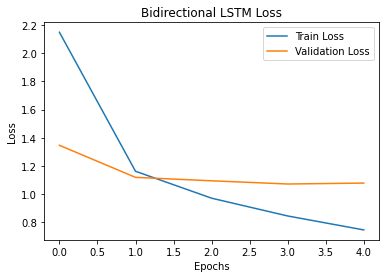

In [85]:
## Plotting

plt.title("Bidirectional LSTM Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.legend(labels=["Train Loss", "Validation Loss"])
plt.show()

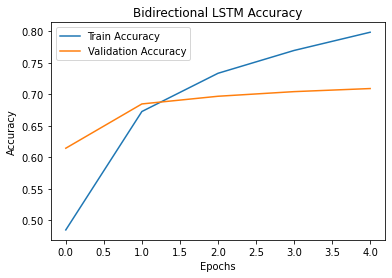

In [86]:
plt.title("Bidirectional LSTM Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(labels=["Train Accuracy", "Validation Accuracy"])
plt.show()

### BERT Model

In [30]:
import tensorflow as tf

# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [31]:
# devices list
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [32]:
from transformers import DistilBertTokenizer, TFAutoModel, BertTokenizer, TFBertModel, TFBertForSequenceClassification 

bert_large = "bert-base-uncased"
distil_bert = "distilbert-base-uncased"

tokenizer = BertTokenizer.from_pretrained(bert_large)
transformer_layer = TFBertModel.from_pretrained(bert_large)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [33]:
# encoding the input in batches
def encode_input(input, tokenizer, maxlen=512):
    encoded = tokenizer.batch_encode_plus(
        input,
        return_token_type_ids=False,
        max_length=maxlen, padding='max_length',
        return_attention_mask=False, return_tensors='tf',
        truncation=True
    )

    return encoded['input_ids']

In [34]:
ndf2 = df_new.copy()
# combining the headline and short description columns
ndf2['news'] = ndf2['headline'] + ndf2['short_description']


In [35]:
from sklearn.model_selection import train_test_split
# splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(ndf2['news'], ndf2['categoryEncoded'], random_state = 42, test_size = 0.3)

In [36]:
# Train Data
X_train_encoded = encode_input(list(X_train.astype('str')), tokenizer, maxlen=100)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=15,dtype = 'int32')

# Test Data
X_test_encoded = encode_input(list(X_test.astype('str')), tokenizer, maxlen=100)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=15,dtype = 'int32')

In [37]:
print(X_train_encoded.shape)

# X_train_1_encoded=X_train_1_encoded.reshape((X_train_1_encoded.shape[0], 1))
sh = X_train_encoded.shape[1]
sh

(103685, 100)


100

In [38]:
import tensorflow as tf

def build_model(transformer, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(sh,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
#     print(sequence_output)
    cls_token = sequence_output[:, 0, :]
    #adding dropout layer
#     print(cls_token)
    x = tf.keras.layers.Dropout(0.3)(cls_token)
    #using a dense layer of 40 neurons as the number of unique categories is 40.
    out = tf.keras.layers.Dense(15, activation='softmax')(x)
    model = tf.keras.Model(inputs=input_word_ids, outputs=out)
    return model

In [39]:
with strategy.scope():
  model = build_model(transformer_layer, max_len=100)

#using categorical crossentropy as the loss as it is a multi-class classification problem
model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 100)]            0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             100, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                             

In [40]:
# model.layers[1].trainable = False

In [41]:
for l in model.layers:
  print(l.name, l.trainable)

input_word_ids True
tf_bert_model True
tf.__operators__.getitem True
dropout_41 True
dense_4 True


In [42]:
# model.summary()

In [43]:
# Dataset preparation
BATCH_SIZE = 32 
train_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_train_encoded, y_train_encoded))
    .batch(BATCH_SIZE)
)
test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((X_test_encoded, y_test_encoded))
    .batch(BATCH_SIZE)
)

In [46]:
# Training
n_steps = X_train_encoded.shape[0] // BATCH_SIZE
print(n_steps)
train_history = model.fit(
    train_dataset,
    epochs=5, batch_size=BATCH_SIZE
)

3240
Epoch 1/5
3241/3241 [==============================] - 797s 246ms/step - loss: 0.8539 - accuracy: 0.7398
Epoch 2/5
3241/3241 [==============================] - 738s 228ms/step - loss: 0.5664 - accuracy: 0.8204
Epoch 3/5
3241/3241 [==============================] - 738s 228ms/step - loss: 0.4375 - accuracy: 0.8578
Epoch 4/5
3241/3241 [==============================] - 738s 228ms/step - loss: 0.3336 - accuracy: 0.8906
Epoch 5/5
3241/3241 [==============================] - 738s 228ms/step - loss: 0.2484 - accuracy: 0.9169


In [47]:
train_history.history

{'loss': [0.853899359703064,
  0.5663864612579346,
  0.43750524520874023,
  0.3335547149181366,
  0.24842044711112976],
 'accuracy': [0.7397984266281128,
  0.8204368948936462,
  0.8577904105186462,
  0.8906013369560242,
  0.9169214367866516]}

In [48]:
# Evaluation
model.evaluate(test_dataset)

2023-08-01 22:49:41.980217: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int32 and shape [44437,15]
	 [[{{node Placeholder/_1}}]]


1389/1389 [==============================] - 147s 104ms/step - loss: 0.7471 - accuracy: 0.8116


[0.7470861077308655, 0.811553418636322]

In [49]:
# Saving the model
model.save("model_bert_tf.h5")

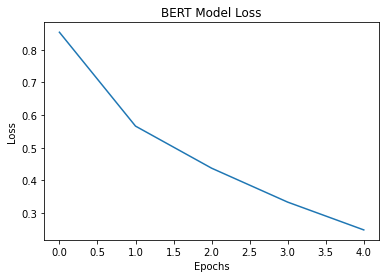

In [52]:
## Plotting

plt.xlabelel("Epochs")
plt.ylabel("Loss")
plt.title("BERT Model Loss")
plt.plot(train_history.history['loss'])
plt.show()

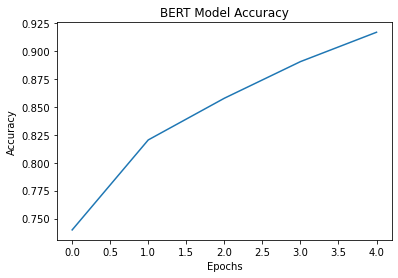

In [55]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("BERT Model Accuracy")
plt.plot(train_history.history['accuracy'])
plt.show()